In [75]:
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import warnings
import nltk
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv('mtsamples.csv', sep=',')
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [77]:
df.shape

(4999, 6)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [79]:
df.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [80]:
df=df[~df.transcription.isnull()]

In [81]:
df.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription           0
keywords             1068
dtype: int64

In [82]:
df.medical_specialty.value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Dentistry                          27
 Cosmetic / Plastic Surge

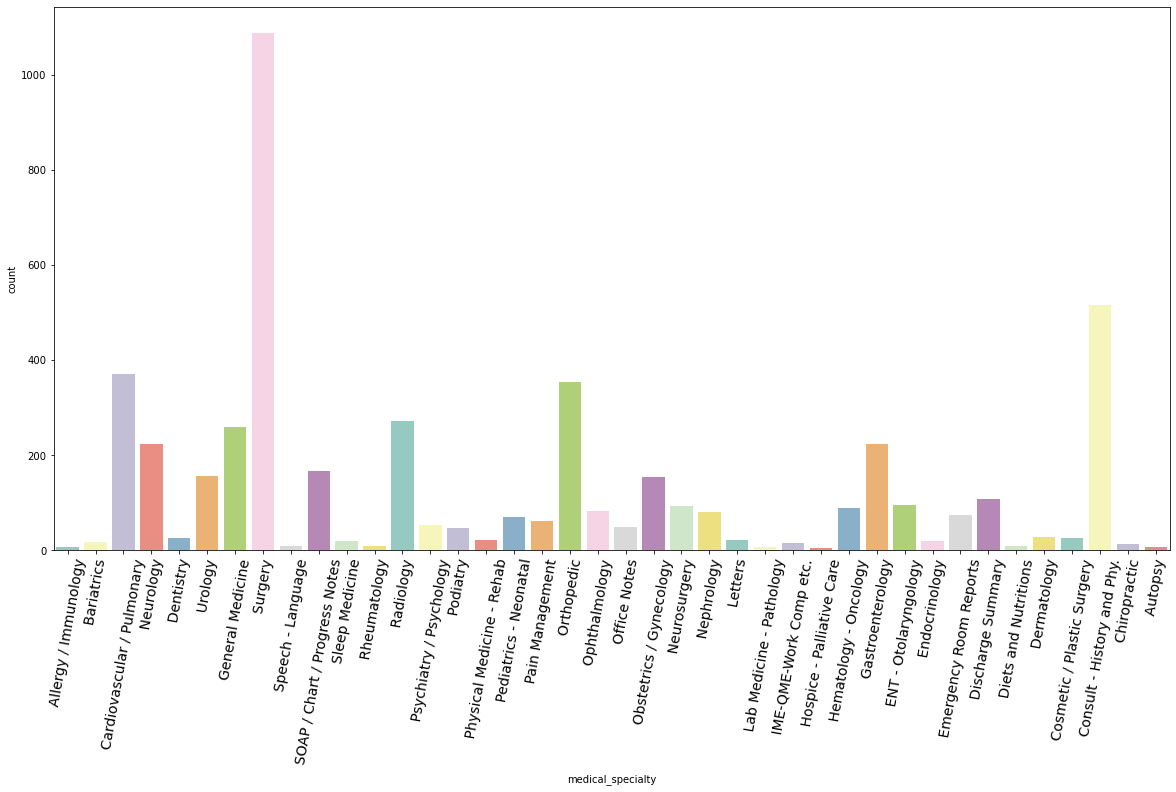

In [83]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=80,fontsize=14)
sns.countplot(x='medical_specialty', data=df,palette="Set3")


In [84]:
df.sample_name.nunique()

2360

In [85]:
df=df[df.medical_specialty.apply(lambda x : str(x).strip()).isin(['Cardiovascular / Pulmonary','Orthopedic'])]

In [86]:
df.shape

(726, 6)

In [87]:
df.iloc[0]['transcription']

'2-D M-MODE: , ,1.  Left atrial enlargement with left atrial diameter of 4.7 cm.,2.  Normal size right and left ventricle.,3.  Normal LV systolic function with left ventricular ejection fraction of 51%.,4.  Normal LV diastolic function.,5.  No pericardial effusion.,6.  Normal morphology of aortic valve, mitral valve, tricuspid valve, and pulmonary valve.,7.  PA systolic pressure is 36 mmHg.,DOPPLER: , ,1.  Mild mitral and tricuspid regurgitation.,2.  Trace aortic and pulmonary regurgitation.'

In [88]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
nlp=spacy.load('en_core_web_lg')

def lemmatize(text):
    words_in_para =[]
    lemmatizer = WordNetLemmatizer()
    doc=nlp(text)
    for token in doc:
        words_in_para.append(token.lemma_)
    return ' '.join(words_in_para) 

def stemmize(text):
    words_in_para =[]
    stemmer = PorterStemmer()
    doc=nlp(text)
    for token in doc:
        words_in_para.append(stemmer.stem(token.text))
    return ' '.join(words_in_para) 

# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
import string
import re

def text_cleaning(text): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub(' ', text2)
    cleaned_str=str(' '.join([word for word in text2.split() if word not in (stop)]))
    return cleaned_str

def text_clean(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    STOPWORDS = set(stopwords.words('english'))
    
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    words = text.split()
    i = 0
    while i < len(words):
        if (words[i] in STOPWORDS) or (re.search('[0-9]+',words[i])!=None) or (len(words[i])<3):
            words.pop(i)
        else:
            i += 1
    text = ' '.join(map(str, words))# delete stopwords from text
    return text

In [89]:
df['cleaned_transcription'] = df.transcription.apply(text_clean).apply(lemmatize)

In [90]:
df.cleaned_transcription

3       mmode leave atrial enlargement leave atrial di...
4       leave ventricular cavity size wall thickness a...
7       echocardiogram multiple view heart great vesse...
9       description normal cardiac chamber size normal...
11      study mild aortic stenosis widely calcified mi...
                              ...                        
4972    indication chest pain type test adenosine nucl...
4973    chief complaint chest pain history present ill...
4974    history present illness patient woman follow a...
4975    history present illness abc gentleman markedly...
4976    reason consultation abnormal echocardiogram fi...
Name: cleaned_transcription, Length: 726, dtype: object

In [91]:
df.transcription.iloc[1]

'1.  The left ventricular cavity size and wall thickness appear normal.  The wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%.  There is near-cavity obliteration seen.  There also appears to be increased left ventricular outflow tract gradient at the mid cavity level consistent with hyperdynamic left ventricular systolic function.  There is abnormal left ventricular relaxation pattern seen as well as elevated left atrial pressures seen by Doppler examination.,2.  The left atrium appears mildly dilated.,3.  The right atrium and right ventricle appear normal.,4.  The aortic root appears normal.,5.  The aortic valve appears calcified with mild aortic valve stenosis, calculated aortic valve area is 1.3 cm square with a maximum instantaneous gradient of 34 and a mean gradient of 19 mm.,6.  There is mitral annular calcification extending to leaflets and supportive structures with thickening of mitral valve leaflets with mi

In [92]:
df.cleaned_transcription.iloc[6]

'title operation youngswick osteotomy internal screw fixation first right metatarsophalangeal joint right foot preoperative diagnosis hallux limitus deformity right foot postoperative diagnosis hallux limitus deformity right foot anesthesia monitor anesthesia care mixture marcaine lidocaine plain estimate blood loss less hemostasis right ankle tourniquet set mmhg minute material use vicryl vicryl two partially thread cannulated screw osteomed system internal fixation injectable ancef minute preoperatively description procedure patient bring operating room place operating table supine position adequate sedation achieve anesthesia team abovementione anesthetic mixture infiltrate directly patient right foot anesthetize future surgical site right ankle cover cast padding ankle tourniquet place around right ankle set mmhg right ankle tourniquet inflate right foot preppe scrub drape normal sterile technique attention direct dorsal aspect first right metatarsophalangeal joint linear incision 

In [93]:
df.cleaned_transcription.iloc[1]

'leave ventricular cavity size wall thickness appear normal wall motion leave ventricular systolic function appear hyperdynamic estimate ejection fraction nearcavity obliteration see also appear increase leave ventricular outflow tract gradient mid cavity level consistent hyperdynamic leave ventricular systolic function abnormal leave ventricular relaxation pattern see well elevate left atrial pressure see doppler examination leave atrium appear mildly dilated right atrium right ventricle appear normal aortic root appear normal aortic valve appear calcify mild aortic valve stenosis calculate aortic valve area square maximum instantaneous gradient mean gradient mitral annular calcification extend leaflet supportive structure thicken mitral valve leaflet mild mitral regurgitation tricuspid valve appear normal trace tricuspid regurgitation moderate pulmonary artery hypertension estimate pulmonary artery systolic pressure mmhg estimate right atrial pressure mmhg pulmonary valve appear norm

In [94]:
df.shape

(726, 7)

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [96]:
from sklearn.model_selection import train_test_split

X = df.cleaned_transcription
y = df.medical_specialty

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [97]:
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer(max_df=.9,lowercase=True,ngram_range=(1,3), analyzer='word', stop_words='english',max_features=1000)),
                     ('clf', LogisticRegression(solver='lbfgs')),
])

In [98]:
#Training the model
text_clf_lr.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lr.predict(X_test)


from sklearn import metrics
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

# Print a classification report
print(metrics.classification_report(y_test,predictions))

# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

0.9954128440366973
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       1.00      0.99      0.99        99
                 Orthopedic       0.99      1.00      1.00       119

                   accuracy                           1.00       218
                  macro avg       1.00      0.99      1.00       218
               weighted avg       1.00      1.00      1.00       218

[[ 98   1]
 [  0 119]]


In [99]:
import pickle

filename = 'finalized_model.pkl'
pickle.dump(text_clf_lr, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9954128440366973


In [100]:
type(X_test)

pandas.core.series.Series

In [104]:
loaded_model.predict(np.array(['Heart burn']))

array([' Cardiovascular / Pulmonary'], dtype=object)

In [103]:
loaded_model.predict(np.array(['fracture']))

array([' Orthopedic'], dtype=object)

In [105]:
probability=text_clf_lr.predict_proba(X_test)
probability

array([[0.09893666, 0.90106334],
       [0.13087177, 0.86912823],
       [0.72478828, 0.27521172],
       [0.7123707 , 0.2876293 ],
       [0.85719868, 0.14280132],
       [0.83305933, 0.16694067],
       [0.14738701, 0.85261299],
       [0.1758917 , 0.8241083 ],
       [0.81158859, 0.18841141],
       [0.91605532, 0.08394468],
       [0.75675964, 0.24324036],
       [0.14351707, 0.85648293],
       [0.83085861, 0.16914139],
       [0.37640551, 0.62359449],
       [0.95956129, 0.04043871],
       [0.90279886, 0.09720114],
       [0.24901724, 0.75098276],
       [0.18591598, 0.81408402],
       [0.22432153, 0.77567847],
       [0.83600432, 0.16399568],
       [0.18952369, 0.81047631],
       [0.32700197, 0.67299803],
       [0.89798379, 0.10201621],
       [0.59708385, 0.40291615],
       [0.12855916, 0.87144084],
       [0.9453451 , 0.0546549 ],
       [0.06201316, 0.93798684],
       [0.94798427, 0.05201573],
       [0.91723258, 0.08276742],
       [0.49872763, 0.50127237],
       [0.

In [106]:
predict_summary=pd.DataFrame({'transcription':X_test,'prediction':predictions,'actual_label' : y_test,'probability':list(probability)})
wrong_predict=predict_summary[predict_summary.prediction!=predict_summary.actual_label]
wrong_predict.head(27)

,transcription,prediction,actual_label,probability
4727,find unresponsive rhf complain severe unclear ...,Orthopedic,Cardiovascular / Pulmonary,"[0.40448443599072703, 0.595515564009273]"


In [108]:
wrong_predict.transcription.iloc[0]

'find unresponsive rhf complain severe unclear whether prior take unknown analgesic vomit lie bed husband husband awake find unresponsive stiff straight arm strange breathing pattern brain scan reveal large intracranial mass intubate hyperventilate abg local lab value include wbc rbc hgb hct bun glucose give mannitol load dph load transfer helicopter uihc pmh myasthenia gravis years thymectomy meds imuran prednisone mestinon mannitol dph fhx shx marry tobacco packyear quit nearly year ago etoh substance abuse unknown exam mechanically ventilate rate unresponsive verbal stimulation pupil unresponsive light fix spontaneous eye movement blink threat papilledema intraocular hemorrhage note trace corneal reflex bilaterally gag reflex oculocephalic reflex motor sensory spontaneous movement noxious stimulation deep nail bed pressure either extend upper extremity ruelue withdraw stimulate extremity right leave gait station coordination test reflex right leave bilateral babinski sign hct large 

In [109]:
lr_probs=probability[:,1]

In [110]:
r_auc = metrics.roc_auc_score(y_test, lr_probs)

In [111]:
r_auc

0.9996604702487056

In [112]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_probs,pos_label=text_clf_lr.classes_[1])

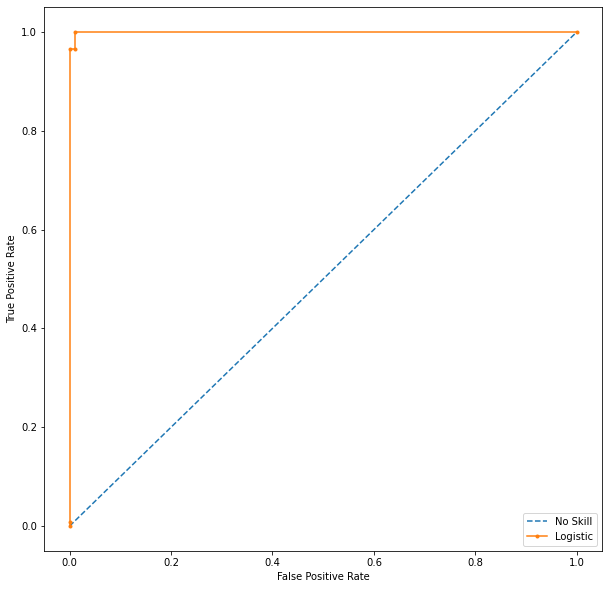

In [113]:
plt.figure(figsize=(10,10))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

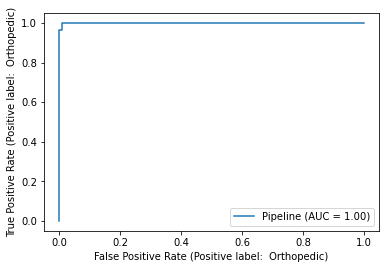

In [114]:
metrics.plot_roc_curve(text_clf_lr, X_test, y_test)

In [115]:
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print(f'Best Threshold={thresholds[ix]}, G-Mean={gmeans[ix]}')

Best Threshold=0.5012723710386647, G-Mean=0.9949366763261821


In [116]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, lr_probs,pos_label=text_clf_lr.classes_[1])

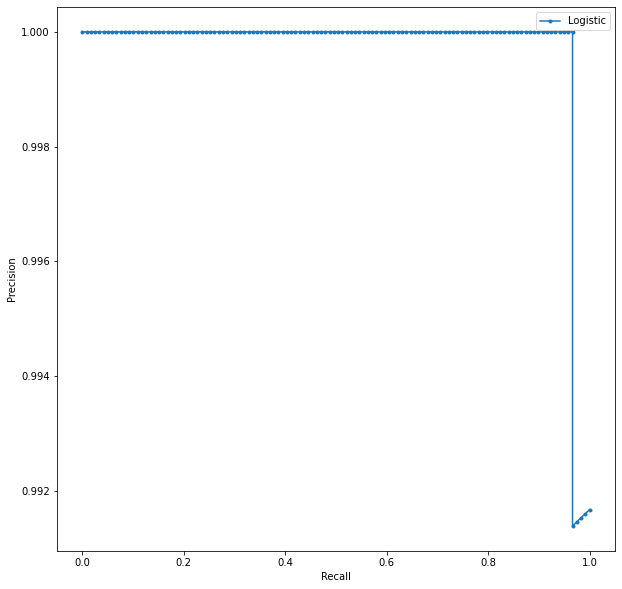

In [117]:
plt.figure(figsize=(10,10))
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [118]:
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]}, Recall={recall[ix]},Precission={precision[ix]}')

Best Threshold=0.5012723710386647, F-Score=0.99581589958159, Recall=1.0,Precission=0.9916666666666667


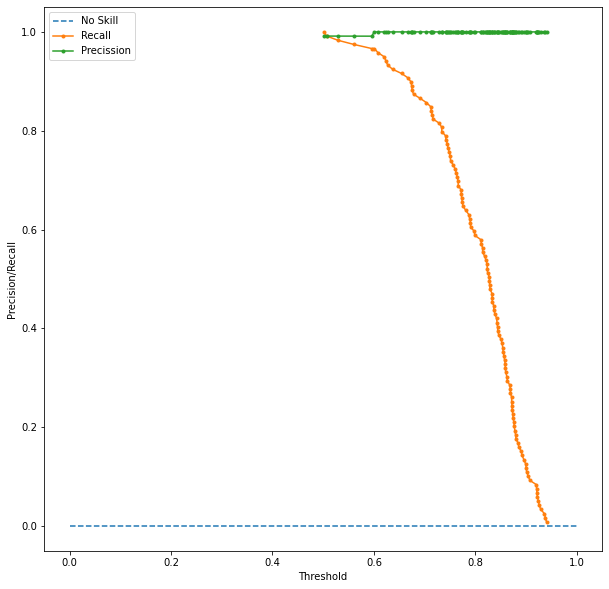

In [119]:
plt.figure(figsize=(10,10))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot( thresholds,recall[0:len(recall)-1], marker='.', label='Recall')
plt.plot( thresholds,precision[0:len(precision)-1], marker='.', label='Precission')
# axis labels
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
# show the plot
plt.show()

In [120]:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer(max_df=.9,min_df=2,lowercase=True,ngram_range=(1,4), analyzer='word', stop_words='english', max_features=1000)),
                     ('clf', MultinomialNB()),
])

#Training the model
text_clf_nb.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_nb.predict(X_test)

# Report the confusion matrix
from sklearn import metrics
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

# Print a classification report
print(metrics.classification_report(y_test,predictions))

0.9770642201834863
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.97      0.98      0.97        99
                 Orthopedic       0.98      0.97      0.98       119

                   accuracy                           0.98       218
                  macro avg       0.98      0.98      0.98       218
               weighted avg       0.98      0.98      0.98       218



In [44]:

df['clean_desc'] = df.description.apply(text_cleaning).apply(lemmatize)

In [45]:
df.clean_desc

3                                           mmode doppler
4                                          echocardiogram
7                                          echocardiogram
9                                  echocardiogram doppler
11      normal left ventricle moderate biatrial enlarg...
                              ...                        
4972    adenosine nuclear scan patient unable walk tre...
4973    patient present chief complaint chest pain adm...
4974    patient recurrent left arm pain stent three da...
4975    patient markedly abnormal stress test severe c...
4976    abnormal echocardiogram finding followup short...
Name: clean_desc, Length: 726, dtype: object

In [46]:
df.shape

(726, 8)

In [47]:
from sklearn.model_selection import train_test_split

X = df.clean_desc
y = df.medical_specialty

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [48]:
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer(max_df=.9,min_df=2,lowercase=True,ngram_range=(1,4), analyzer='word', stop_words='english', max_features=1000)),
                     ('clf', LogisticRegression(solver='lbfgs')),
])

In [49]:
#Training the model
text_clf_lr.fit(X_train, y_train)
# Form a prediction set
predictions = text_clf_lr.predict(X_test,)

# Report the confusion matrix
from sklearn import metrics
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

# Print a classification report
print(metrics.classification_report(y_test,predictions))

0.9770642201834863
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.96      0.99      0.98        99
                 Orthopedic       0.99      0.97      0.98       119

                   accuracy                           0.98       218
                  macro avg       0.98      0.98      0.98       218
               weighted avg       0.98      0.98      0.98       218



In [65]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X = df.cleaned_transcription
y = df.medical_specialty.apply(lambda x: 1 if x=='Orthopedic' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=123)

In [66]:
top_words = 10000 #Vocablury size
t = tf.keras.preprocessing.text.Tokenizer(num_words=top_words) # num_words -> Vocablury size

#Fit tokenizer with actual training data
t.fit_on_texts(X_train)

#Vocabulary
t.word_index


{'patient': 1,
 'right': 2,
 'leave': 3,
 'use': 4,
 'place': 5,
 'procedure': 6,
 'artery': 7,
 'history': 8,
 'pain': 9,
 'well': 10,
 'normal': 11,
 'perform': 12,
 'remove': 13,
 'note': 14,
 'time': 15,
 'diagnosis': 16,
 'take': 17,
 'coronary': 18,
 'incision': 19,
 'anesthesia': 20,
 'chest': 21,
 'position': 22,
 'anterior': 23,
 'also': 24,
 'skin': 25,
 'extremity': 26,
 'distal': 27,
 'catheter': 28,
 'low': 29,
 'disease': 30,
 'follow': 31,
 'proximal': 32,
 'tissue': 33,
 'blood': 34,
 'room': 35,
 'posterior': 36,
 'pressure': 37,
 'knee': 38,
 'heart': 39,
 'make': 40,
 'suture': 41,
 'lateral': 42,
 'area': 43,
 'obtain': 44,
 'femoral': 45,
 'see': 46,
 'show': 47,
 'give': 48,
 'general': 49,
 'fashion': 50,
 'without': 51,
 'medial': 52,
 'pulmonary': 53,
 'tendon': 54,
 'back': 55,
 'present': 56,
 'joint': 57,
 'vein': 58,
 'significant': 59,
 'stenosis': 60,
 'sterile': 61,
 'fracture': 62,
 'surgery': 63,
 'screw': 64,
 'nerve': 65,
 'foot': 66,
 'close': 67,
 

In [67]:
X_train = t.texts_to_sequences(X_train)
X_train

[[82,
  16,
  171,
  38,
  386,
  668,
  72,
  16,
  171,
  38,
  386,
  668,
  6,
  12,
  171,
  38,
  884,
  1137,
  14,
  6,
  122,
  3,
  168,
  38,
  2,
  168,
  38,
  175,
  14,
  150,
  2,
  168,
  38,
  884,
  20,
  49,
  84,
  141,
  34,
  162,
  94,
  8,
  272,
  2994,
  171,
  38,
  386,
  668,
  2995,
  772,
  232,
  76,
  84,
  2544,
  240,
  72,
  405,
  150,
  1,
  791,
  336,
  63,
  455,
  824,
  95,
  14,
  4512,
  1988,
  236,
  1348,
  57,
  45,
  222,
  1461,
  752,
  434,
  631,
  1513,
  2545,
  2546,
  2996,
  2352,
  168,
  38,
  125,
  225,
  6,
  1,
  17,
  83,
  35,
  5,
  187,
  22,
  83,
  35,
  180,
  364,
  258,
  413,
  113,
  5,
  32,
  132,
  2,
  29,
  26,
  2,
  29,
  26,
  1050,
  85,
  78,
  152,
  50,
  669,
  705,
  4,
  753,
  2,
  29,
  26,
  113,
  560,
  212,
  494,
  19,
  40,
  23,
  132,
  2,
  38,
  107,
  33,
  527,
  328,
  52,
  1400,
  1892,
  19,
  40,
  406,
  2353,
  14,
  824,
  95,
  1024,
  296,
  585,
  5,
  27,
  132,
  478,


In [68]:

X_test = t.texts_to_sequences(X_test)
X_test

[[82,
  16,
  2,
  2170,
  787,
  393,
  213,
  72,
  16,
  2,
  2170,
  787,
  393,
  213,
  316,
  12,
  2,
  5053,
  400,
  27,
  2,
  65,
  332,
  2,
  2,
  52,
  7411,
  1794,
  400,
  2,
  65,
  332,
  2,
  558,
  466,
  402,
  80,
  216,
  3,
  1610,
  571,
  64,
  767,
  1881,
  5160,
  402,
  80,
  216,
  20,
  49,
  281,
  1881,
  177,
  803,
  2527,
  2170,
  787,
  315,
  5665,
  42,
  2720,
  60,
  1266,
  615,
  332,
  1,
  273,
  1718,
  400,
  2053,
  746,
  805,
  64,
  1942,
  1385,
  9,
  1,
  576,
  1314,
  76,
  84,
  2156,
  2849,
  7892,
  5396,
  203,
  840,
  357,
  120,
  2848,
  63,
  63,
  270,
  270,
  603,
  99,
  76,
  69,
  416,
  258,
  333,
  1723,
  1,
  3668,
  791,
  336,
  147,
  198,
  6,
  1,
  136,
  83,
  35,
  908,
  299,
  305,
  5,
  49,
  20,
  1350,
  1,
  1300,
  1910,
  28,
  5,
  1,
  1181,
  1146,
  1558,
  7802,
  180,
  4,
  37,
  137,
  527,
  1122,
  55,
  4147,
  1050,
  85,
  78,
  378,
  19,
  509,
  402,
  3290,
  717,
  36,
  

In [69]:

#Define maximum number of words to consider in each review
max_review_length = 500

#Pad training and test reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        maxlen=max_review_length,
                                                        padding='pre')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, 
                                                       maxlen=max_review_length, 
                                                       padding='pre')


In [73]:
#Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(top_words + 1, #Vocablury size
                                    50, #Embedding size
                                    input_length=max_review_length) #Number of words in each review
          )

model.output
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GRU(256,dropout=0.5)) #RNN State - size of cell state and hidden state

model.output

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(2,activation='softmax'))

#Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),tf.keras.metrics.AUC()])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 50)           500050    
_________________________________________________________________
dropout (Dropout)            (None, 500, 50)           0         
_________________________________________________________________
gru (GRU)                    (None, 256)               236544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
Total params: 737,108
Trainable params: 737,108
Non-trainable params: 0
_________________________________________________________________


In [74]:
epochs=40
history=model.fit(X_train,y_train,
          epochs=epochs,
          batch_size=100,  
          validation_data=(X_test, y_test))

Epoch 1/40


ValueError: in user code:

    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1754 binary_crossentropy
        backend.binary_crossentropy(
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:5023 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Diksha\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:132 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1))


In [72]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

val_precission = history.history['val_precision']
val_recall = history.history['val_recall']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, val_precission, label='validation precission')
plt.plot(epochs_range, val_recall, label='Validation recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


NameError: name 'history' is not defined